# <span style="color:red">**Algunos Algoritmos de regresión**</span>


La regresión lineal es el algoritmo más sencillo del aprendizaje automático y se puede entrenar de forma diferente. En esta sesión cubriremos los siguientes algoritmos lineales:

- Linear Regression
- Ridge Regression
- LASSO Regression
- Elastic Net
- Polynomial Regression
- Random Forest Regressor
- Support Vector Machine


**<span style="color:green">MAPE (Error porcentual absoluto medio):**

- El MAPE es una medida de precisión para modelos de pronóstico que expresa el error como un porcentaje del valor real.
- Se calcula tomando el promedio del valor absoluto de la diferencia porcentual entre el valor real y el valor pronosticado, dividido por el valor real.
- Es útil para evaluar la precisión de modelos de pronóstico en diferentes escalas y dominios de datos.


**<span style="color:green">MPE (Error porcentual medio):**

- El MPE es una medida de la precisión de un modelo que muestra el error promedio como un porcentaje del valor real.
- Se calcula tomando el promedio de las diferencias porcentuales entre el valor real y el valor pronosticado, dividido por el valor real.
- Es similar al MAPE pero no toma el valor absoluto de las diferencias, lo que significa que puede indicar si el modelo tiende a sobrestimar o subestimar los valores.


**<span style="color:green">R2 Square (Coeficiente de determinación R cuadrado):**

- El coeficiente de determinación R cuadrado es una medida de cuánta variabilidad en la variable dependiente puede ser explicada por el modelo.
- Toma valores entre 0 y 1, donde 0 indica que el modelo no explica ninguna variabilidad y 1 indica que el modelo explica toda la variabilidad.
- Es una medida de la bondad del ajuste del modelo y se utiliza comúnmente en la regresión para evaluar qué tan bien se ajustan los datos al modelo.


**<span style="color:green">% Observaciones en ±20% de MAPE:**

- Esta métrica representa el porcentaje de observaciones cuyo error porcentual absoluto está dentro del ±20% del MAPE.
- Es una medida adicional que proporciona información sobre qué tan bien se comporta el modelo en términos de precisión relativa, específicamente enfocado en un rango de error porcentual.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

# Función print_evaluate(true, predicted): imprime las métricas de evaluación del modelo.
def print_evaluate(true, predicted):  
    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2
    
    # Calcular el porcentaje de observaciones dentro del ±20% de MAPE
    ape = np.abs((true - predicted) / true) * 100
    within_20_percent = np.sum(ape <= 20) / len(true) * 100
    
    print('MAPE:', mape)
    print('MPE:', mpe)
    print('R2 Square:', r2_square)
    print('% Observaciones en ±20% de MAPE:', within_20_percent)
    print('__________________________________')

In [3]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [8]:
df_ingresos = pd.read_csv("../data/raw/salarios.csv", index_col=None)
df_ingresos = df_ingresos[['lwage', 'exper', 'black', 'married', 'educ',
       'union', 'hours']]

## **Revisión del dataset y EDA**

In [9]:
df_ingresos.head()

,lwage,exper,black,married,educ,union,hours
0,1.669188,8.0,0.0,0.0,14.0,0.0,2640.0
1,1.820334,11.0,0.0,0.0,13.0,0.0,2476.0
2,2.873161,11.0,0.0,1.0,12.0,0.0,2340.0
3,2.135689,9.0,0.0,1.0,12.0,0.0,2860.0
4,2.112393,12.0,0.0,1.0,12.0,0.0,2080.0


In [10]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lwage    545 non-null    float64
 1   exper    545 non-null    float64
 2   black    545 non-null    float64
 3   married  545 non-null    float64
 4   educ     545 non-null    float64
 5   union    545 non-null    float64
 6   hours    545 non-null    float64
dtypes: float64(7)
memory usage: 29.9 KB


In [11]:
df_ingresos.describe().T

,count,mean,std,min,25%,50%,75%,max
lwage,545.0,1.866479,0.466890,-0.191009,1.571356,1.892331,2.160595,3.343164
exper,545.0,10.014679,1.654918,7.000000,9.000000,10.000000,11.000000,18.000000
black,545.0,0.115596,0.320034,0.000000,0.000000,0.000000,0.000000,1.000000
married,545.0,0.614679,0.487118,0.000000,0.000000,1.000000,1.000000,1.000000
educ,545.0,11.766972,1.747585,3.000000,11.000000,12.000000,12.000000,16.000000
union,545.0,0.262385,0.440335,0.000000,0.000000,0.000000,1.000000,1.000000
hours,545.0,2354.724771,538.899066,675.000000,2080.000000,2204.000000,2568.000000,4992.000000


In [12]:
df_ingresos.columns

Index(['lwage', 'exper', 'black', 'married', 'educ', 'union', 'hours'], dtype='object')

In [13]:

# ! NO MODIFICAR
# * Función creada para contar el porcentaje de missings existente por cada variable

def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Porcentaje de missing values por columna', fontsize=20, weight='bold' , y=1.1)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns con más de {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columnas con menos de {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de missing values')
    plt.yticks(weight ='bold')
    
    return plt.show()

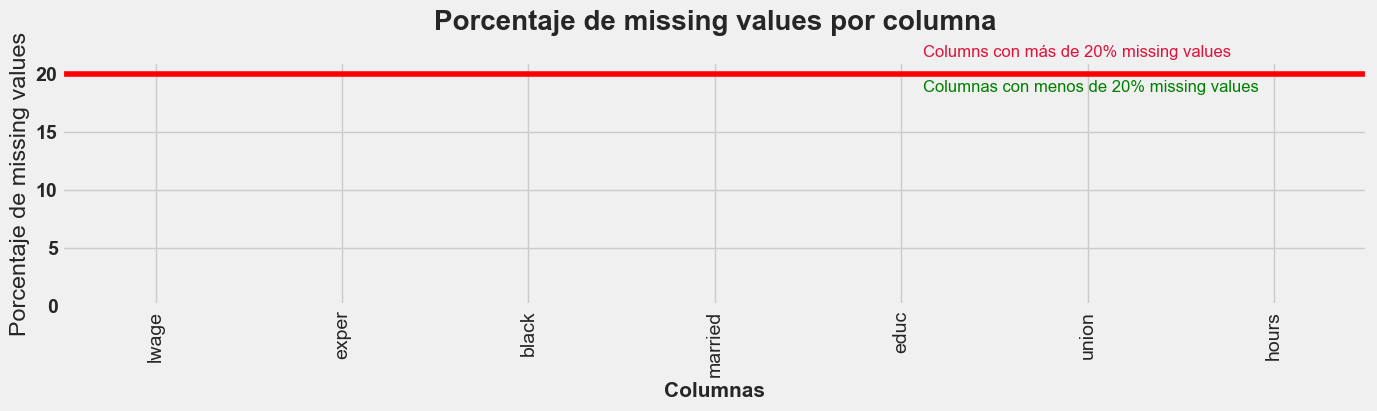

In [14]:
msv_1(df_ingresos, 20, color=sns.color_palette('Reds',15))

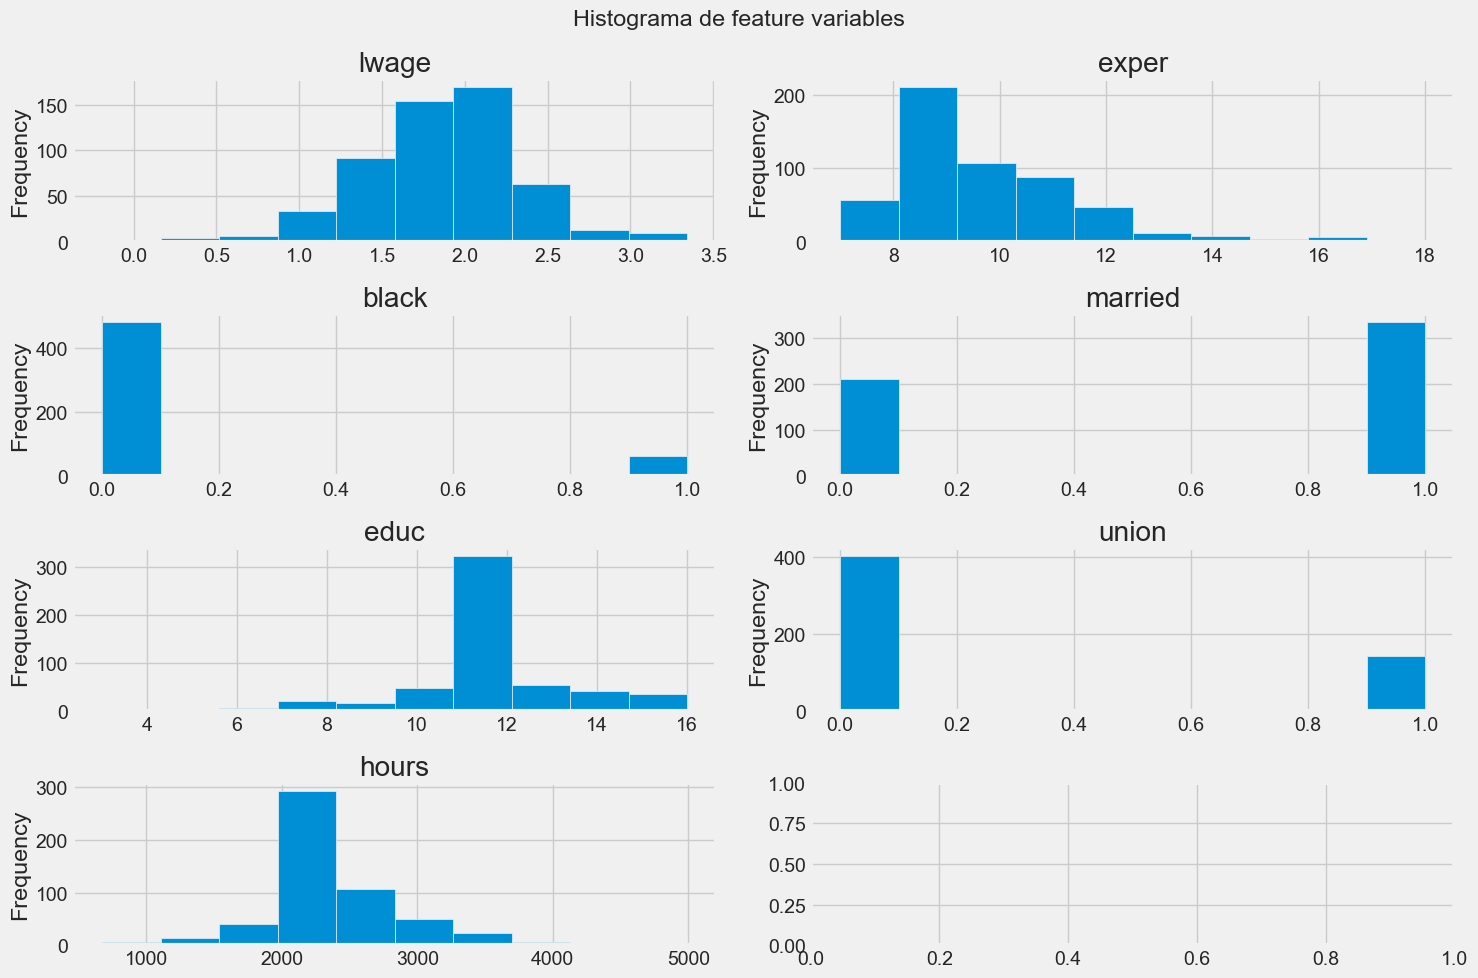

In [15]:
# Crear una figura con 4 filas y 2 columnas de subgráficos, con un tamaño de 15x10 pulgadas
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
# Aplanar la matriz de subgráficos para facilitar el acceso
axes = axes.flatten()
# Inicializar un índice para recorrer las columnas del DataFrame
ax_idx = 0
# Obtener las columnas del DataFrame
columns = df_ingresos.columns
# Iterar a través de las columnas y crear histogramas en cada subgráfico
for col in columns:
    # Crear un histograma para la columna actual en el subgráfico correspondiente
    df_ingresos[col].plot(kind='hist', ax=axes[ax_idx], title=col)
    # Incrementar el índice para pasar al siguiente subgráfico
    ax_idx += 1
# Agregar un título general para los subgráficos
plt.suptitle('Histograma de feature variables')
# Ajustar automáticamente la disposición de los subgráficos para evitar superposiciones
plt.tight_layout()
# Mostrar los subgráficos
plt.show()

<Axes: >

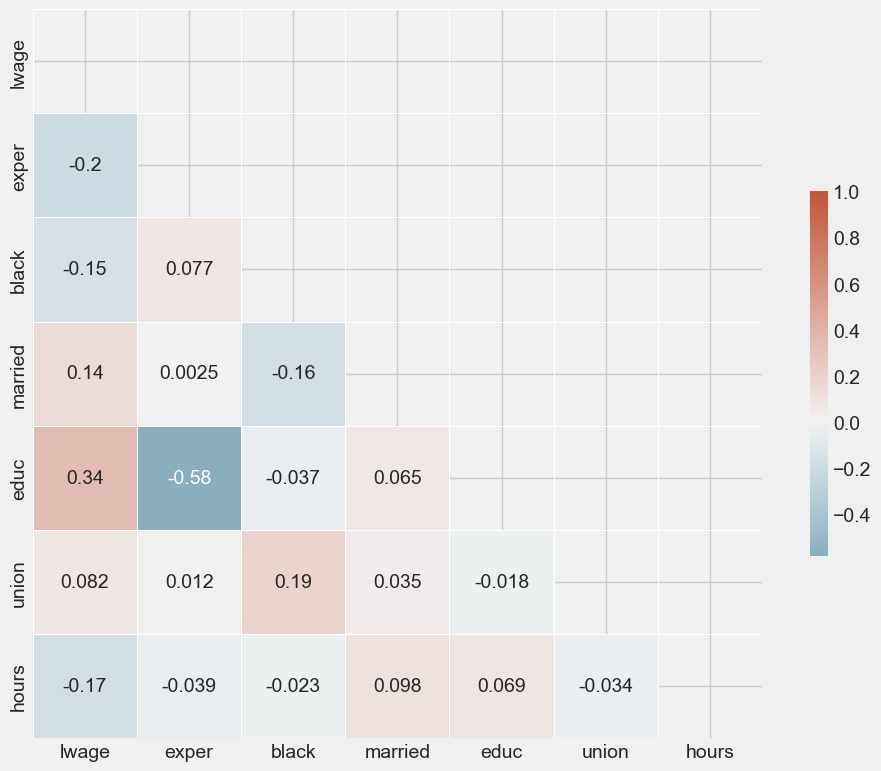

In [16]:
# Calcula la matriz de correlación entre las columnas del DataFrame.
corr = df_ingresos.corr()
# Crea una máscara triangular superior en la matriz de correlación para ocultar los valores duplicados.
mask = np.triu(np.ones_like(corr, dtype=bool))
# Crea una figura para el gráfico de calor de la matriz de correlación.
f, ax = plt.subplots(figsize=(11, 9))
# Define una paleta de colores divergentes para el gráfico de calor.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Trazar un mapa de calor de la matriz de correlación.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## **Preparemos los insumos**

X e y

In [17]:
X = df_ingresos[['exper', 'black', 'married', 'educ', 'union',
       'hours']]

y = df_ingresos[['lwage']]

Train y Test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## <span style="color:blue">**Linear Regression Model**

La regresión lineal es un modelo que busca establecer una relación lineal entre una variable dependiente y una o más variables independientes.
Busca encontrar la mejor línea recta que se ajuste a los datos para realizar predicciones.

In [19]:

# * Entrenamos el modelo

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:

# * Métricas de evaluación

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluación:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluación:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluación:
_____________________________________
MAPE: 21.449876926208606
MPE: -5.90447268980748
R2 Square: 0.17892785003590128
% Observaciones en ±20% de MAPE: lwage    67.073171
dtype: float64
__________________________________
Train set evaluación:
_____________________________________
MAPE: 22.877696727822606
MPE: -4.382163820361503
R2 Square: 0.1973635044339721
% Observaciones en ±20% de MAPE: lwage    65.091864
dtype: float64
__________________________________


In [23]:

# * Veamos los coeficientes

# Obtener los coeficientes y los nombres de las columnas
coeficientes = lin_reg.coef_
nombres_columnas = X_train.columns
# Asegurarse de que los coeficientes sean 1D
coeficientes = coeficientes.flatten()
# Crear un DataFrame con los nombres de las columnas y los coeficientes
coeficientes_df = pd.DataFrame({'Columna': nombres_columnas, 'Coeficiente': coeficientes})
coeficientes_df

,Columna,Coeficiente
0,exper,-0.006339
1,black,-0.233132
2,married,0.109816
3,educ,0.093250
4,union,0.122588
5,hours,-0.000167


In [24]:

# * Predicciones

# Calculamos la predicción
pred = lin_reg.predict(X_test)


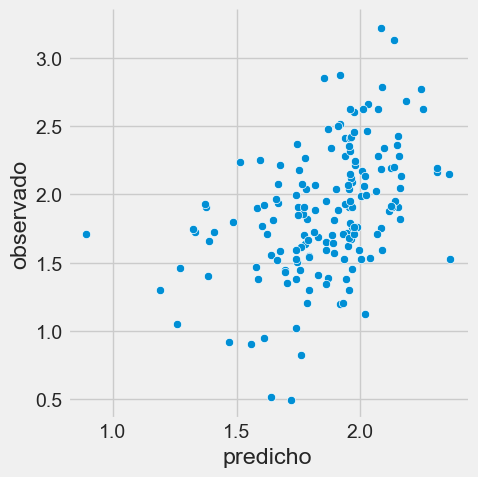

In [25]:

# * Comparamos las predicciones con valores observados
# Creamos un DF
pred = pd.DataFrame(pred, columns=['prediccion_lr'])
# Lo unimos con la data observada
pred_lin_reg = pd.concat([pred, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
pred_lin_reg.columns =['predicho','observado']
# Creamos un gráfico
sns.relplot(data=pred_lin_reg, x='predicho',y='observado')

<Axes: xlabel='error', ylabel='Count'>

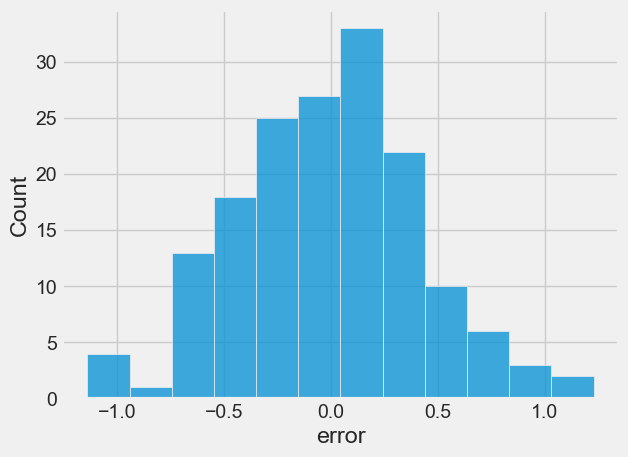

In [26]:

# * Observamos la distribución de los errores
pred_lin_reg['error'] = pred_lin_reg['predicho'] - pred_lin_reg['observado']
sns.histplot(data=pred_lin_reg, x='error')

## **<span style="color:blue">Robust Regression**

La regresión robusta es una variante de la regresión lineal que es menos sensible a valores atípicos o errores en los datos.
Utiliza técnicas que reducen el impacto de los valores extremos en el modelo de regresión.

In [29]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(max_trials=100) 
# max_trials es un parámetro utilizado en el algoritmo RANSAC (Random Sample Consensus) que controla el número máximo de intentos o iteraciones que el algoritmo realizará para ajustar un modelo a un conjunto de datos. 
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluación:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluación:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluación:
_____________________________________
MAPE: 22.852112410682686
MPE: -8.60769219243628
R2 Square: 0.07044854601546824
% Observaciones en ±20% de MAPE: lwage    59.146341
dtype: float64
__________________________________
Train set evaluación:
_____________________________________
MAPE: 24.823393827909488
MPE: -7.317670174988098
R2 Square: 0.057205507029931435
% Observaciones en ±20% de MAPE: lwage    64.304462
dtype: float64
__________________________________


## <span style="color:blue">**Ridge Regression**

Ridge Regression es una técnica de regresión lineal que agrega una penalización L2 a la función de costo.
Ayuda a prevenir el sobreajuste (overfitting) al restringir los coeficientes de regresión, lo que a menudo conduce a modelos más estables.

In [33]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1, solver='cholesky', tol=0.00001, random_state=42)
# alpha= Controla la fuerza de la regularización aplicada al modelo.
# solver= especifica el algoritmo utilizado para resolver el problema de optimización asociado con el modelo Ridge
# tol= es la tolerancia utilizada para determinar la convergencia del algoritmo de optimización
# random_state= se utiliza para controlar la inicialización aleatoria del modelo y asegurar la reproducibilidad de los resultados.

model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 21.44828512144762
MPE: -5.907277608004458
R2 Square: 0.17899969214574452
% Observaciones en ±20% de MAPE: lwage    67.073171
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 22.87848155099706
MPE: -4.382299385215738
R2 Square: 0.19736326413698702
% Observaciones en ±20% de MAPE: lwage    65.091864
dtype: float64
__________________________________


## <span style="color:blue">**LASSO Regression**

LASSO (Least Absolute Shrinkage and Selection Operator) es una técnica de regresión lineal que agrega una penalización L1 a la función de costo.
Es útil para la selección de características y tiende a generar modelos con coeficientes dispersos (algunos coeficientes se vuelven exactamente cero).

In [38]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01, 
              precompute=True, 
              selection='random',
              random_state=42)
# alpha=0.1: El hiperparámetro alpha controla la fuerza de la regularización L1 (Lasso). 
# precompute=True: El parámetro precompute permite calcular la matriz de datos previamente para acelerar el ajuste del modelo en ciertos casos.
# selection='random': selection determina cómo se seleccionan las características durante el proceso de ajuste

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = model.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 21.382518564083163
MPE: -6.458919485283678
R2 Square: 0.18473280853026564
% Observaciones en ±20% de MAPE: lwage    65.243902
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 23.1531907927226
MPE: -4.489941406531666
R2 Square: 0.1878540007974755
% Observaciones en ±20% de MAPE: lwage    66.666667
dtype: float64
__________________________________


## <span style="color:blue">**Elastic Net**

Elastic Net es una combinación de Ridge y LASSO que utiliza penalizaciones L1 y L2.
Ofrece un equilibrio entre la selección de características de LASSO y la estabilidad de Ridge.

In [40]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=1, selection='random', random_state=42)
# alpha=0.1: El hiperparámetro alpha controla la fuerza de la regularización en ElasticNet. Un valor mayor de alpha aumenta la regularización, similar a Lasso.
# l1_ratio=0.9: l1_ratio controla la proporción entre la penalización L1 (Lasso) y L2 (Ridge) en ElasticNet. Un valor de 1 significa penalización L1 pura (como Lasso), mientras que 0 significa penalización L2 pura (como Ridge). 


model.fit(X_train, y_train)

test_pred = model.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = model.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 21.457749362203874
MPE: -7.183051425763963
R2 Square: 0.15053811622288582
% Observaciones en ±20% de MAPE: lwage    65.243902
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 24.048689510146705
MPE: -4.79082669916513
R2 Square: 0.12856042796828293
% Observaciones en ±20% de MAPE: lwage    65.616798
dtype: float64
__________________________________


## <span style="color:blue">**Polynomial Regression**

La regresión polinómica es una extensión de la regresión lineal que modela relaciones no lineales mediante la adición de términos polinómicos.
Ajusta un polinomio a los datos y puede capturar patrones más complejos.

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
# degree=2: El parámetro degree indica el grado del polinomio al que se elevarán las características originales. 
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = model.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = model.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 21.457749362203874
MPE: -7.183051425763963
R2 Square: 0.15053811622288582
% Observaciones en ±20% de MAPE: lwage    65.243902
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 24.048689510146705
MPE: -4.79082669916513
R2 Square: 0.12856042796828293
% Observaciones en ±20% de MAPE: lwage    65.616798
dtype: float64
__________________________________


## <span style="color:blue">**Random Forest Regressor**

Random Forest es un modelo de ensamble basado en árboles de decisión que se utiliza para tareas de regresión.
Combina múltiples árboles para mejorar la precisión y manejar relaciones no lineales.

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
# n_estimators=1000: El parámetro n_estimators controla el número de árboles de decisión que se utilizarán en el bosque aleatorio.

rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = rf_reg.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 21.457749362203874
MPE: -7.183051425763963
R2 Square: 0.15053811622288582
% Observaciones en ±20% de MAPE: lwage    65.243902
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 24.048689510146705
MPE: -4.79082669916513
R2 Square: 0.12856042796828293
% Observaciones en ±20% de MAPE: lwage    65.616798
dtype: float64
__________________________________


## <span style="color:blue">**Support Vector Machine**

SVM es un modelo que se utiliza tanto para clasificación como para regresión.
En el contexto de regresión, busca encontrar un hiperplano que minimice la distancia entre los puntos de datos y el hiperplano, mientras que controla la cantidad de error permitido.

In [45]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000, epsilon=0.05)
# kernel='rbf': El parámetro kernel especifica el tipo de kernel que se utilizará en el modelo. En este caso, se está utilizando el kernel radial (RBF, Radial Basis Function), que es uno de los kernels más comunes para SVM en problemas de regresión.
# C=1000000: El parámetro C controla el parámetro de regularización en el modelo. Un valor más alto de C permite que el modelo se ajuste más a los datos de entrenamiento, lo que puede llevar al sobreajuste si se establece demasiado alto. 
# epsilon=0.001: El parámetro epsilon determina el margen de error permitido en la regresión. 

svm_reg.fit(X_train, y_train)

test_pred = model.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = model.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 21.457749362203874
MPE: -7.183051425763963
R2 Square: 0.15053811622288582
% Observaciones en ±20% de MAPE: lwage    65.243902
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 24.048689510146705
MPE: -4.79082669916513
R2 Square: 0.12856042796828293
% Observaciones en ±20% de MAPE: lwage    65.616798
dtype: float64
__________________________________
